<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Proyecto_Final_ANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base de datos tomada de Kaggle:** https://www.kaggle.com/datasets/arunjangir245/super-market-sales/data

#**0. Cargamos Librerias**

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Librerías para clustering
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.ensemble import IsolationForest

# Score de silueta
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables.

#**1. Cargamos y Organizamos la Base de Datos**

In [ ]:
#Cargamos la base de datos
data = pd.read_csv('/content/supermarket_sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#Seleccionamos Variables Relevantes
data1= data.drop(labels=['Invoice ID','Unit price','Tax 5%', 'Time', 'cogs', 'gross income', 'Date', 'Quantity', 'gross margin percentage'], axis=1)
data1

,Branch,City,Customer type,Gender,Product line,Total,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,548.9715,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,80.2200,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,340.5255,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,489.0480,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,634.3785,Ewallet,5.3
...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,42.3675,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,1022.4900,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,33.4320,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,69.1110,Cash,4.1


In [ ]:
data1.shape

(1000, 8)

In [ ]:
data1.isna().sum()

,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Total,0
Payment,0
Rating,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Total          1000 non-null   float64
 6   Payment        1000 non-null   object 
 7   Rating         1000 non-null   float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


#**2. Análisis Exploratorio de Datos**

In [ ]:
data1.describe()

,Total,Rating
count,1000.000000,1000.00000
mean,322.966749,6.97270
std,245.885335,1.71858
min,10.678500,4.00000
25%,124.422375,5.50000
50%,253.848000,7.00000
75%,471.350250,8.50000
max,1042.650000,10.00000


**Total:** el total de ventas presenta una alta variabilidad, con un promedio de transacción moderado, pero con una amplia gama de valores que van desde pequeñas hasta grandes transacciones. Esto podría reflejar diferentes tipos de productos o distintas cantidades compradas.

**Rating:** La satisfacción del cliente es buena en general, pero con margen de mejora. La mayoría de los clientes calificaron por encima de 5, y la mediana es 7, lo cual es aceptable, pero hay una oportunidad para que el servicio o los productos alcancen niveles de calificación más altos de manera más consistente.

*Realizamos gráficos para el entendimiento de las variables*

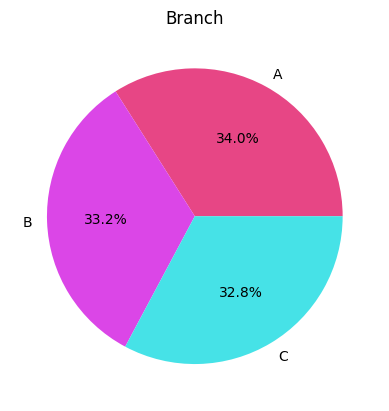

In [ ]:
tabla_frecuencia = data1['Branch'].value_counts()
colors = ['#e74685', '#db46e7', '#46e2e7']
plt.pie(tabla_frecuencia,labels=tabla_frecuencia.index, autopct='%1.1f%%', colors = colors)
plt.title("Branch")
plt.show()

El mercado con mayor cantidad de datos es el 'A' con 34%, seguido del 'B' con 33,2%, y finalmente estaria el 'C' con 32.8%. Asimismo, notamos que los tres supermercados tienen una frecuencia muy pareja entre ellos.

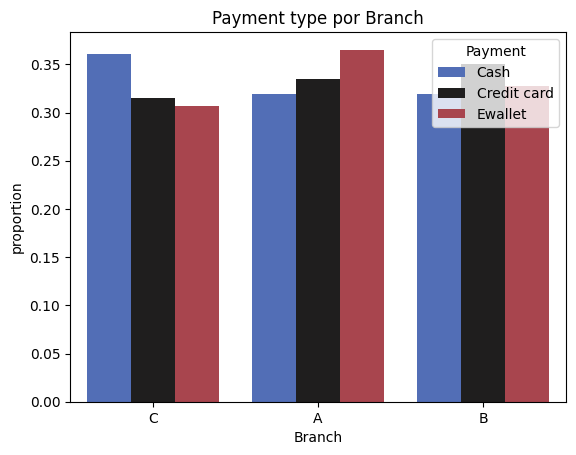

In [ ]:
tabla_frecuencia_relacion= data1.groupby('Payment')['Branch'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='Branch', y='proportion', hue='Payment', palette = 'icefire')
plt.xlabel('Branch')
plt.title('Payment type por Branch')
plt.show()

Los clientes del supermercado 'C' prefieren pagar con 'Cash'. Mientras, que los del supermercado 'A' lo hacen con 'Ewallet'. Y el supermercado 'B' con 'Credit Card'. De esta forma notamos que en cada supermercado los clientes tienen un tipo de pago preferido, y con el que realizan la mayoria de las compras.

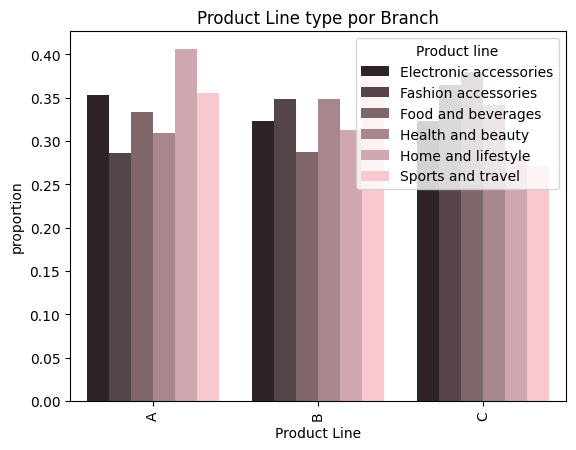

In [ ]:
tabla_frecuencia_relacion= data1.groupby('Product line')['Branch'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='Branch', y='proportion', hue='Product line', color = 'pink')
plt.xlabel('Branch')
plt.xticks(rotation=90)
plt.title('Product Line type por Branch')
plt.show()

**Electronic accessories:** La proporción de ventas de Electronic accessories es relativamente similar entre las tres sucursales, aunque la sucursal B y C presentan valores muy cercanos. La sucursal A muestra una leve ventaja en esta categoría.

**Fashion Accessories:** Esta categoría parece ser más popular en la sucursal C, que tiene la proporción más alta comparada con las otras sucursales. Las sucursales A y B tienen una proporción comparable, pero más baja que la de C.

**Food and Beverages:** La sucursal C lidera en ventas de alimentos y bebidas, mientras que A y B muestran proporciones más bajas y similares entre ellas. Esto podría indicar una especialización o preferencia en la sucursal C por este tipo de productos.

**Health and Beauty:** la proporción de ventas de productos de salud y belleza es relativamente uniforme entre las tres sucursales, sin grandes diferencias. La sucursal B, sin embargo, tiene una leve ventaja.

**Home and Lifestyle:** La sucursal A domina esta categoría, con una proporción más alta en comparación con B y C, que presentan valores bastante similares y más bajos. Esto podría reflejar una estrategia o perfil de clientela diferente en la sucursal A.

**Sports and Travel:** La sucursal B destaca en ventas de productos de deportes y viajes, mientras que las sucursales A y C tienen proporciones más bajas. Esto sugiere que la sucursal B podría atraer a un tipo de cliente más orientado al deporte y los viajes.

Después de análizar notamos que hay diferencias notables en las preferencias de productos entre las distintas sucursales. Esto podría deberse a factores como la ubicación geográfica, el perfil demográfico de los clientes, o estrategias de marketing específicas de cada sucursal. Por ejemplo, la sucursal C parece especializarse más en productos de  Fashion Accessories y Food and Beverages, mientras que la sucursal A se inclina hacia Electronic accessories y Home and lifestyle, finalmente la  parece especializarse B hacia Health and Beauty y Sports and Travel.



Definimos cual es el supermercado con menor cantidad de ventas

In [ ]:
#Hacemos una suma de los totales de cada supermercado
total_por_supermercado = data1.groupby('Branch')['Total'].sum()
print(total_por_supermercado)

#Mostramos el que menor resultado tiene
menor_total = total_por_supermercado.idxmin()
print("El supermercado con menor total de ventas es: ", menor_total)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64
El supermercado con menor total de ventas es:  B


Con base a la tabla anterior, podemos establecer que el supermercado con menor número total de ventas es el supermercado **B**

#**3. Implementación de Técnica**

##*3.1. Detección de Datos Atípicos*

Cambiamos las variable categóricas a variable númericas

In [ ]:
#Get_dumies me tranforma las variables categóricas y el sistema me las transforma a variables númericas
datos_numericos = pd.get_dummies(data1,
                                 columns=['Branch',
                                          'City',
                                          'Customer type',
                                          'Gender',
                                          'Product line',
                                          'Payment'], )
datos_numericos

,Total,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,548.9715,9.1,True,False,False,False,False,True,True,False,...,False,False,False,False,True,False,False,False,False,True
1,80.2200,9.6,False,False,True,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
2,340.5255,7.4,True,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,True,False
3,489.0480,8.4,True,False,False,False,False,True,True,False,...,True,False,False,False,True,False,False,False,False,True
4,634.3785,5.3,True,False,False,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42.3675,6.2,False,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
996,1022.4900,4.4,False,True,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
997,33.4320,7.7,True,False,False,False,False,True,True,False,...,True,False,False,True,False,False,False,True,False,False
998,69.1110,4.1,True,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
datos_numericos.columns

Index(['Total', 'Rating', 'Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay',
       'City_Naypyitaw', 'City_Yangon', 'Customer type_Member',
       'Customer type_Normal', 'Gender_Female', 'Gender_Male',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

Vamos a realizar la técnica de **"Isolation Forest"** para la detección de datos atípicos.

In [ ]:
#Creamos un copia
data2 = datos_numericos.copy()

In [ ]:
modelo_atipicos = IsolationForest(contamination=0.01, random_state=123)
modelo_atipicos.fit(data2)
data2["atipico_isolation_forest"] = modelo_atipicos.predict(data2)
data2["atipico_isolation_forest"].value_counts()

,count
atipico_isolation_forest,
1,990
-1,10


In [ ]:
#Se crea un DataFrame para los datos sin atípicos
data_sa = data2[data2["atipico_isolation_forest"] == 1]
data_sa.head()

,Total,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,...,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,atipico_isolation_forest
0,548.9715,9.1,True,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,True,1
1,80.2200,9.6,False,False,True,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,1
2,340.5255,7.4,True,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,True,False,1
3,489.0480,8.4,True,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,True,1
4,634.3785,5.3,True,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,True,1


##*3.2. Clústers*

In [ ]:
#Creamos una copia para no dañar la original
data_sa1 = data_sa.copy()

#Estandarizamos las variables
scaler = StandardScaler()
scaled_features= scaler.fit_transform(data_sa1)
scaled_features

array([[ 0.96941524,  1.24124633,  1.39200771, ..., -0.66885605,
         1.37342542,  0.        ],
       [-0.98960339,  1.53324183, -0.71838683, ..., -0.66885605,
        -0.72810652,  0.        ],
       [ 0.09827222,  0.24846163,  1.39200771, ...,  1.49509   ,
        -0.72810652,  0.        ],
       ...,
       [-1.18514103,  0.42365893,  1.39200771, ..., -0.66885605,
        -0.72810652,  0.        ],
       [-1.03603041, -1.67870868,  1.39200771, ..., -0.66885605,
        -0.72810652,  0.        ],
       [ 1.38870658, -0.21873118,  1.39200771, ..., -0.66885605,
        -0.72810652,  0.        ]])

##K-Means

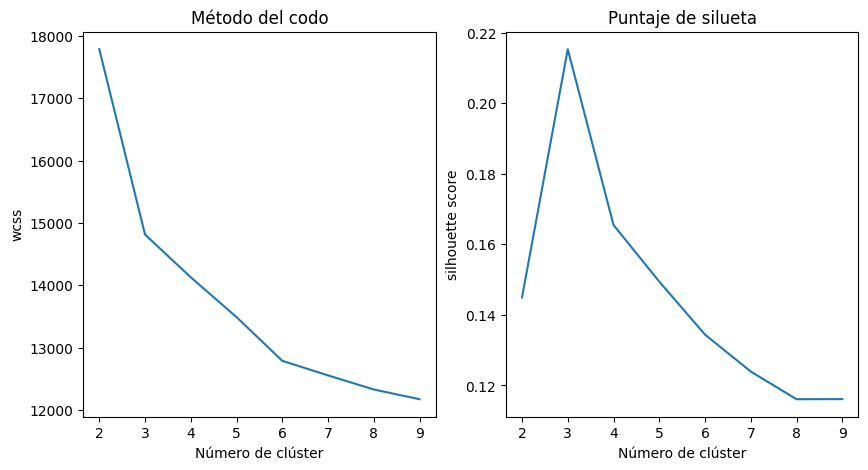

In [ ]:
silueta_score=[]
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Según el método del codo, notamos un codo pronunciado en el punto 3, al igual que otros no tan pronunciados en los puntos 5, 6, 7 y 8. El puntaje de silueta nos muestra un punto máximo en el 3. En vista del próposito de este ejercicio y con base a las gráficas anteirores el número apropiado de clúster es **3**.

In [ ]:
#Si escogemos 3
k_means=KMeans(3, random_state=123  )
k_means.fit(scaled_features )
data_sa1["labels_k_means"]= k_means.labels_
data_sa1["labels_k_means"] = data_sa1["labels_k_means"].astype(str)
data_sa1["labels_k_means"].value_counts()

,count
labels_k_means,
0,337
1,332
2,321


In [ ]:
#Interpretamos los Datos
print(data_sa1["labels_k_means"].value_counts(normalize=True))
px.bar(data_sa1["labels_k_means"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_k_means
0    0.340404
1    0.335354
2    0.324242
Name: proportion, dtype: float64


Con base a la gráfica, nos damos cuenta que el clúster con mayor frecuencia es el 0 (34%), seguido del 2 (32%), el 3 (19%), y finalmente el 1 (13%).

###**Branch**

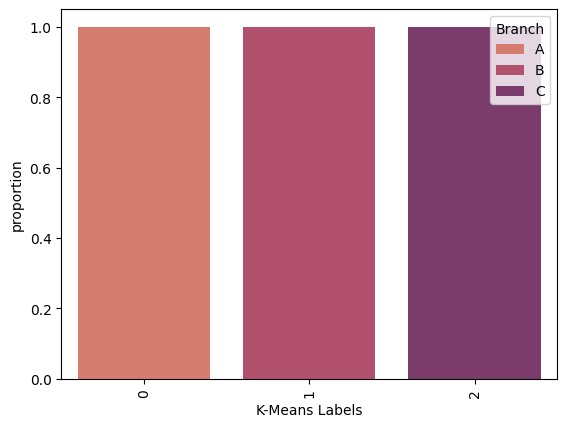

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_k_means', data1['Branch']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_k_means', y='proportion', hue='Branch', data=proportion_data, palette = 'flare')
plt.xlabel('K-Means Labels')
plt.xticks(rotation=90)
plt.show()

Con base aL gráfico anterior podemos darnos cuenta que el clúster 1 pertenece al supermercado B. Mientras que el clúster 0 hace referencia al supermercado A, y el 2 al C.

###**City**

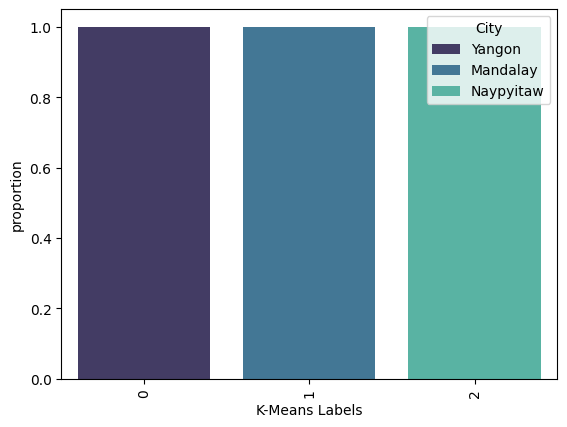

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_k_means', data1['City']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_k_means', y='proportion', hue='City', data=proportion_data, palette = 'mako')
plt.xlabel('K-Means Labels')
plt.xticks(rotation=90)
plt.show()

Con esta variable logramos identificar que los datos pertenecientes al clúster 1, corresponden a la ciudad de 'Mandalay'. Así como el clúster 0 corresponde a la ciudad de 'Yangon', y el clúster 2 a 'Naypyitaw'.

###**Customer Type**

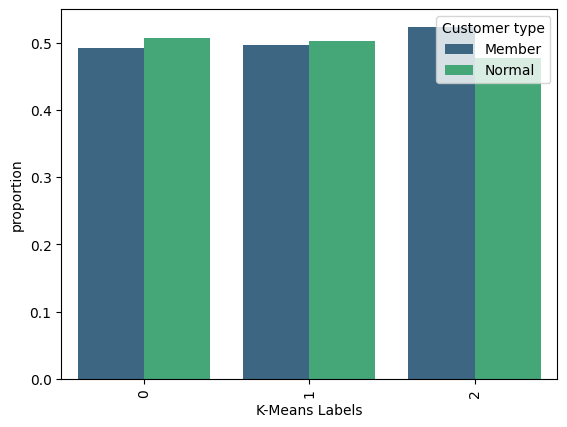

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_k_means', data1['Customer type']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_k_means', y='proportion', hue='Customer type', data=proportion_data, palette = 'viridis')
plt.xlabel('K-Means Labels')
plt.xticks(rotation=90)
plt.show()

In [ ]:
merged_data = pd.merge(data_sa1['labels_k_means'], data1['Customer type'], left_index=True, right_index=True, how='inner')

#Creamos el boxplot
px.box(merged_data, x = 'labels_k_means', y='Customer type', color= 'labels_k_means', title='Customer Type: Boxplot por clúster')

Acá notamos que los tipos de clientes en los tres posibles clústers son muy parejos, y cuentan con una gran variabilidad. En donde los clústers 0 y 1, si bien tienen mayor cantidad de clientes normales, existe una gran variedad de clientes miembros del supermercado. Por el contrario, en el clúster 2, notamos que superan por una cantidad significante el tipo de clientes miembros.  

### **Gender**

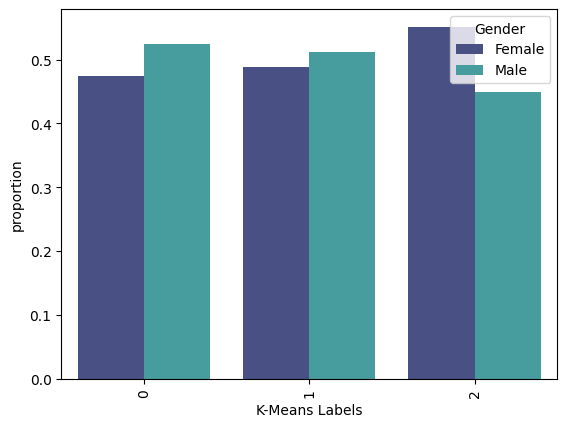

In [ ]:
#Calculamos las proporción para cada clúster y Gender
proportion_data = data_sa1.groupby(['labels_k_means', data1['Gender']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_k_means', y='proportion', hue='Gender', data=proportion_data, palette = 'mako')
plt.xlabel('K-Means Labels')
plt.xticks(rotation=90)
plt.show()

En este gráfico observamos que los tipos de género en los tres clústers son bastante equilibrados, con una distribución relativamente pareja entre hombres y mujeres. En los clústers 0 y 1, aunque existe una ligera inclinación hacia los hombres en el clúster 0 y hacia el balance en el clúster 1, ambos presentan una gran diversidad en cuanto a género. Por otro lado, en el clúster 2, notamos una diferencia significativa, donde las mujeres superan en cantidad a los hombres. Esto sugiere que el clúster 2 agrupa características más asociadas al género femenino, mientras que los clústers 0 y 1 muestran mayor heterogeneidad en su composición de género.

###**Product Line**

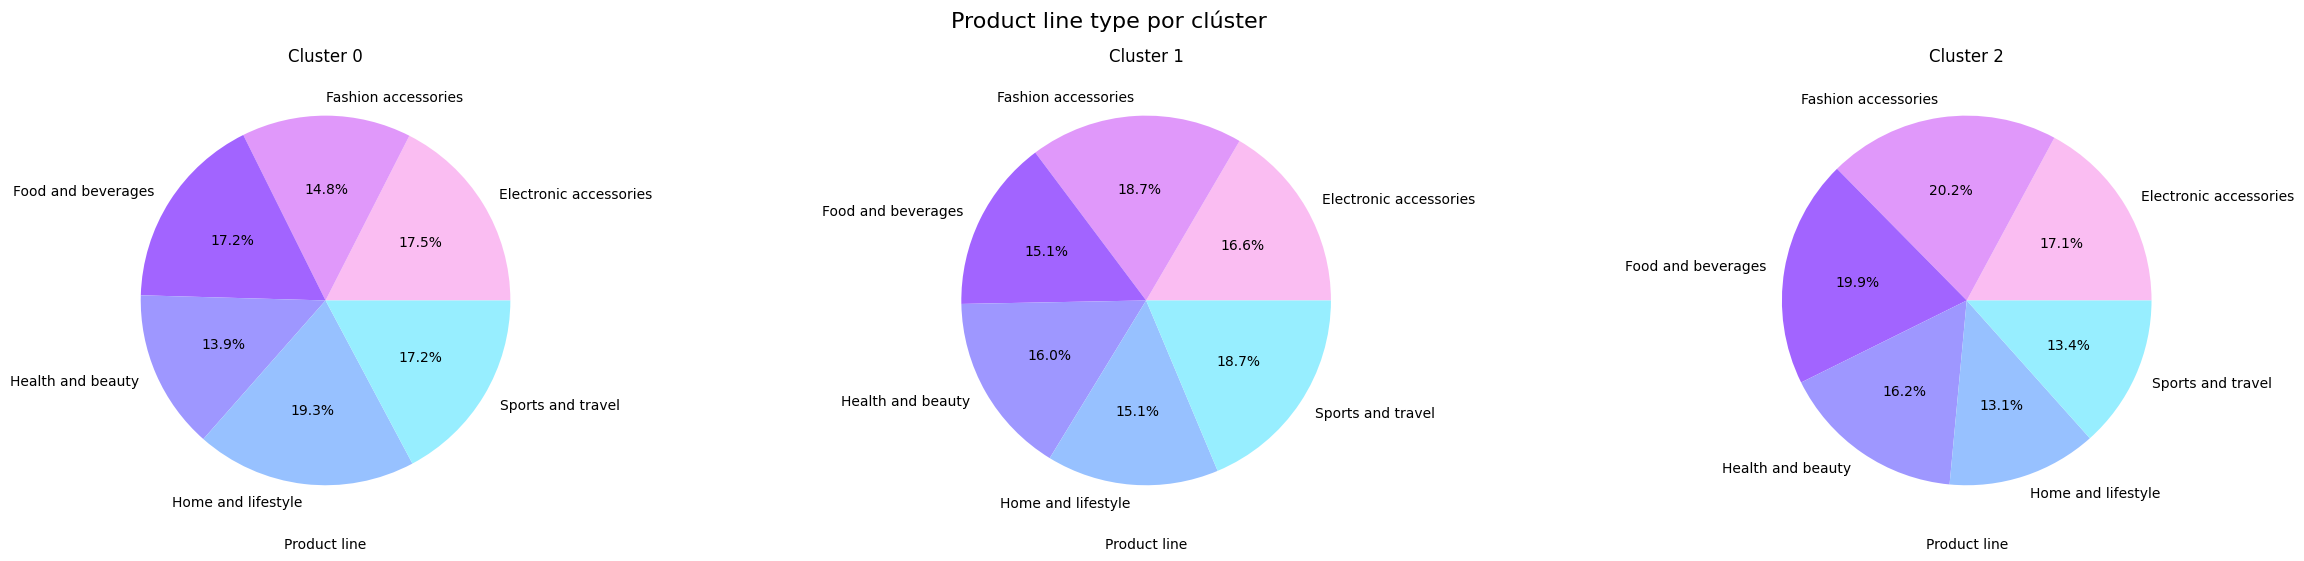

In [ ]:
# Calculamos las proporciones para cada clúster y método de pago
proportion_data = data_sa1.groupby(['labels_k_means', data1['Product line']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')


# Colores para los gráficos de pastel
colors = ['#FABDF2', '#E098FA', '#A264FF', '#9E97FF', '#97C1FF', '#97EEFF']

# Generamos un gráfico tipo pastel para cada clúster
clusters = proportion_data['labels_k_means'].unique()
fig, axes = plt.subplots(1, len(clusters), figsize=(10 * len(clusters), 6))

for i, cluster in enumerate(clusters):
    cluster_data = proportion_data[proportion_data['labels_k_means'] == cluster]
    axes[i].pie(cluster_data['proportion'], labels=cluster_data['Product line'], autopct='%1.1f%%', colors = colors )
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel("Product line")

fig.suptitle('Product line type por clúster', fontsize=16)

plt.show()

En el gráfico vemos una distribución distinta de preferencias en cada clúster de clientes. El clúster 0 muestra una variedad equilibrada de intereses en distintas líneas de producto, con una leve preferencia por "Home and lifestyle" y "Sports and travel". El clúster 1 tiene un interés destacado en "Fashion accessories" y "Sports and travel", sugiriendo un perfil más orientado a la moda y actividades recreativas. En el clúster 2, predominan las categorías "Food and beverages" y "Fashion accessories", indicando una inclinación hacia productos de consumo diario. Estos patrones pueden orientar estrategias de marketing específicas para cada grupo, alineando ofertas con sus preferencias.

###**Total**

In [ ]:
px.box(data_sa1, x='labels_k_means', y='Total',color="labels_k_means",
             title='Costo total de la transacción: Boxplot por clúster')

De acuerdo a la segmentación que nos muestra k-means, podemos ver que el Clúster 2 representa el grupo de clientes que realizan compras de mayor valor, ya que tiene la mediana mas alta (266.028 kiat) y tiene valores atípicos hacía arriba (con mayor frecuencia que los demas clústeres) mientras que los Clústeres 0 y 1 representan grupos con transacciones de menor valor, teniendo medianas de 236.88 kiat y el 1 con mediana de 252.882 kiat.

*Kiat: moneda de Myanmar*

###**Payment**

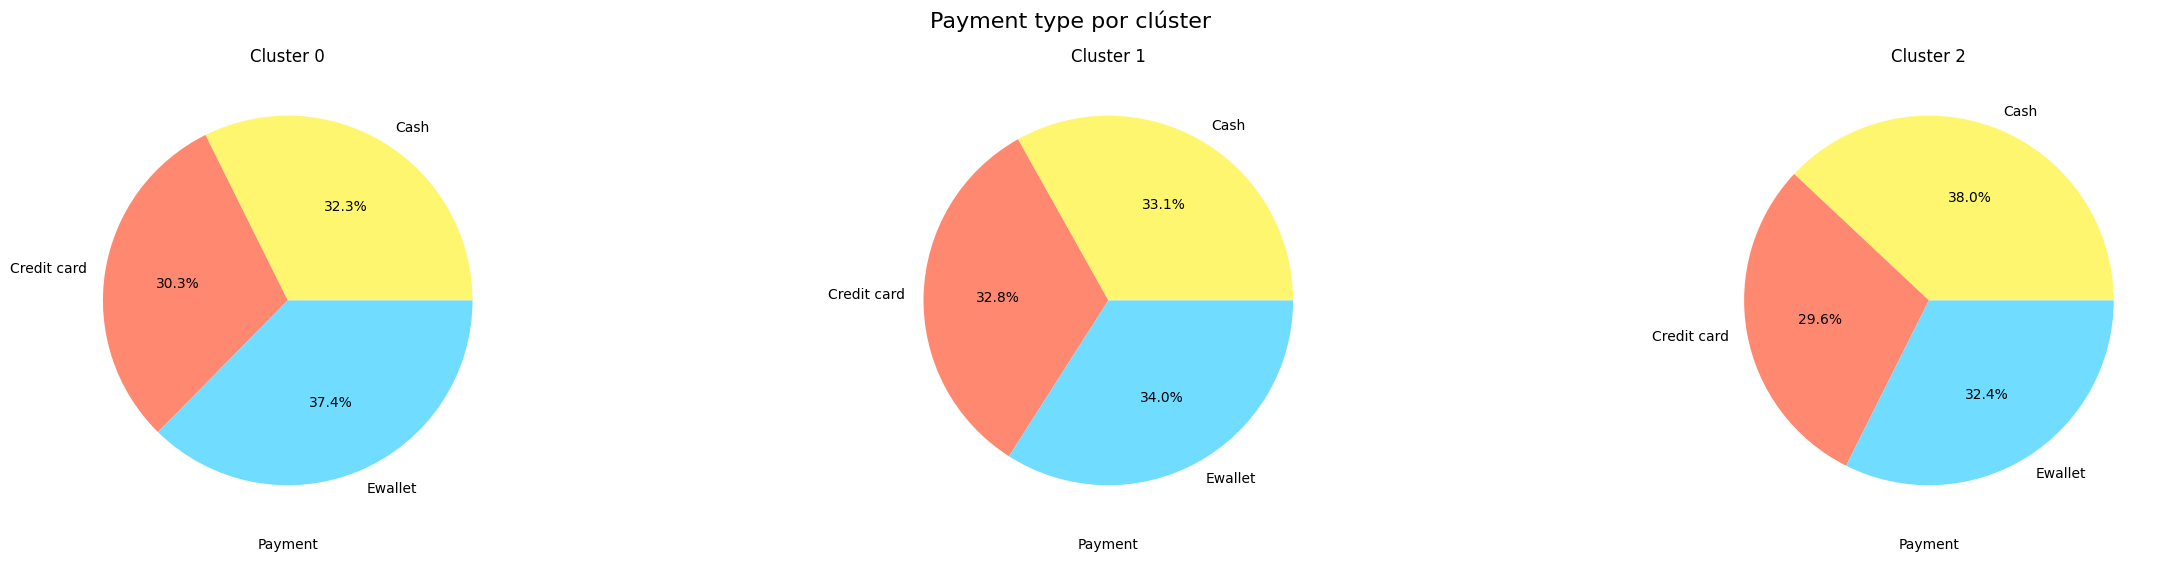

In [ ]:
# Calculamos las proporciones para cada clúster y la variable Payment
proportion_data = data_sa1.groupby(['labels_k_means', data1['Payment']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')

# Colores para los gráficos de pastel
colors = ['#fff670', '#ff8870', '#70dcff']

# Generamos un gráfico tipo pastel para cada clúster
clusters = proportion_data['labels_k_means'].unique()
fig, axes = plt.subplots(1, len(clusters), figsize=(10 * len(clusters), 6))

for i, cluster in enumerate(clusters):
    cluster_data = proportion_data[proportion_data['labels_k_means'] == cluster]
    axes[i].pie(cluster_data['proportion'], labels=cluster_data['Payment'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel("Payment")

fig.suptitle('Payment type por clúster', fontsize=16)

plt.show()

De acuerdo a las graficas que nos muestra el algoritmo de K-means, podemos decir que los diferentes metodos de pago en los tres clústeres tienen una distribución muy equitativa, aún así, la preferencia en el tipo de pago varía en cada clúster. Para el clúster 0 y 1, el tipo de pago preferido es el "Ewallet", con un 37% y un 34% respectivamente, por otro lado para el clúster 2 es el "cash" el metodo que predomina, con un 38%. Así mismo, en todos los clústeres observamos que el metodo de pago con tarjeta de credito es el menos utilizado.

###**Rating**

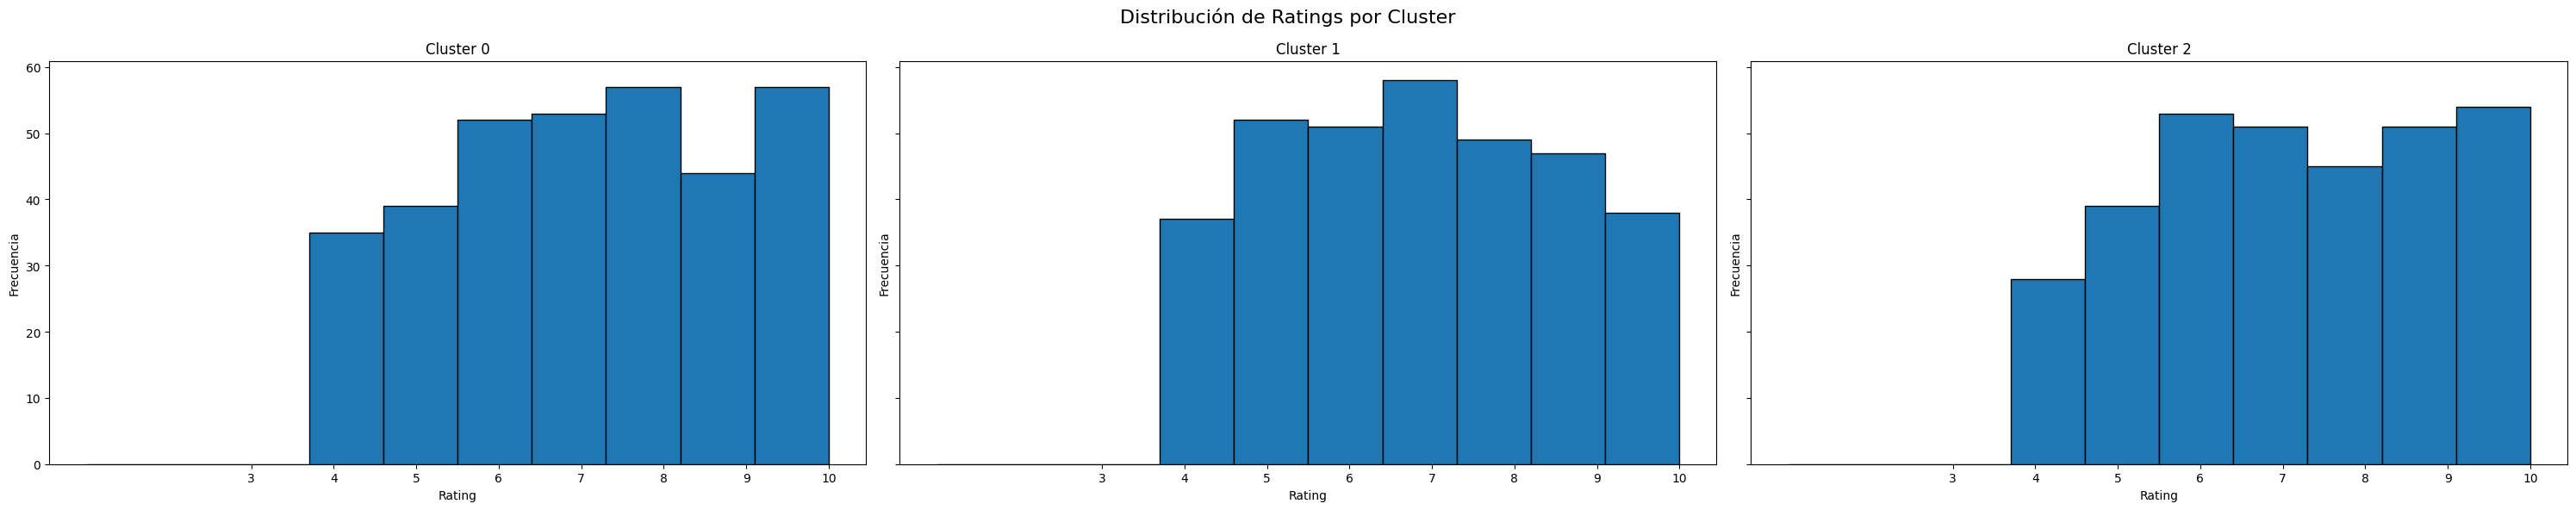

In [ ]:
# Calcula las proporciones para cada clúster y rating
proportion_data = data_sa1.groupby(['labels_k_means', data1['Rating']])['labels_k_means'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_k_means')['count'].transform('sum')

clusters = proportion_data['labels_k_means'].unique()

# Creamos los subplots para cada clúster
fig, axes = plt.subplots(1, len(clusters), figsize=(10 * len(clusters), 6), sharey=True)

# Generar un histograma para cada cluster
for i, cluster in enumerate(clusters):
    cluster_data = data_sa1[data_sa1['labels_k_means'] == cluster]['Rating']
    axes[i].hist(cluster_data, bins=10, edgecolor='black', range=(1, 10))
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Rating')
    axes[i].set_xticks(range(3, 11))
    axes[i].set_ylabel('Frecuencia')

fig.suptitle('Distribución de Ratings por Cluster', fontsize=16)

plt.tight_layout()
plt.show()

Luego de analizar la segmentación que nos realiza K-means, y de acuerdo con las graficas de cada clúster, vemos que el Clúster 2 agrupa a clientes con alta satisfacción, mientras que los Clústeres 0 y 1 agrupan a clientes con niveles de satisfacción más variados y moderados, respectivamente.

###**Análisis de Clústers (K-Means):**

**Cluster 0**

*Branch:* A

*City:* Yangon

*Customer Type:* En su mayoria clientes Normales, pero existe una gran cantidad de clientes que son Miembros.

*Gender:* La proporción de hombres es mayor que la de mujeres. Esto indica que el grupo 0 tiene una tendencia más hacia los hombres.

*Product line:* Las categorías están relativamente balanceadas. Las líneas de producto que destacan son "Home and lifestyle" con un 19.3% y "Sports and travel" con un 17.2%. La línea de producto menos representada es "Health and beauty" con un 13.9%.En general, este clúster muestra una distribución pareja, sin una predominancia marcada de alguna línea específica.

*Total:* Es el clúster con un promedio de transacciones mas bajas, con una mediana de  236,88 Kiat.

*Payment:* El metodo de pago que predomina es el "Ewallet" con un 37.4% de preferencia, seguido por el "cash" con un 32.3%, y finalmente el menos usado es el "credit card" con un 30.3%.

*Rating:* Tiene una distribución más variada en los niveles de satisfacción, en comparación con los demas clústeres, con una ligera tendencia hacia ratings altos.

**Cluster 1**

*Branch:* B

*City:* Mandalay

*Customer Type:* Predominan los clientes Normales, pero hay una gran variedad de clientes que son miembros.

*Gender:* Las proporciones de género están equilibradas, siendo casi iguales tanto para hombres como para mujeres.

*Product line:* En este clúster, "Fashion accessories" y "Sports and travel" son las líneas de producto con mayor representación, con 18.7% y 18.7% respectivamente. Las categorías "Health and beauty" y "Home and lifestyle" tienen una menor proporción, ambas con aproximadamente un 15-16%.Este clúster sugiere que los clientes tienen preferencias más marcadas hacia los accesorios de moda y productos de deportes y viajes.

*Total:* La mediana de este clúster es de 252.882, teniendo transacciones más altas y datos atípicos un poco mas hacia arriba que el clúster 0.

*Payment:* El metodo de pago mas utilizado en este clúster es el "Ewallet" con un 34% de preferencia, luego esta el "cash" con un 33.1%, y finalmente el menos utilizado es el "credit card" con un 32.8%.

*Rating:* Tiene una concentración de ratings en los niveles medios, lo que podría indicar una satisfacción moderada y hay menor variabilidad.

**Cluster 2**

*Branch:* C

*City:* Naypyitaw

*Customer Type:* Predominan los clientes que son Miembros. Sin embargo, existe una creciente cantidad de clientes que son Normales.

*Gender:*  La proporción de mujeres es notablemente mayor que la de hombres.

*Product line:* Aquí, "Food and beverages" tiene la mayor proporción con un 20.2%, seguida de "Fashion accessories" con un 19.9%. Las líneas de producto con menor representación son "Home and lifestyle" y "Sports and travel" con un 13.4% y 13.1% respectivamente. Este clúster podría indicar un grupo de clientes más interesados en productos de consumo diario (alimentos y bebidas), a diferencia de los otros clústeres.

*Total:* Este clúster contiene las transacciones mas altas y los datos atípicos son mas frecuentes que en los clústeres 0 y 1, con una mediana de 266.028.

*Payment:* El metodo de pago mas recurrente es el "Cash", correspondiente al 38% del total, seguido por el "Ewallet" con un 32.4%, y finalmente el menos recurrente es el "credit card" con un 29.5%.

*Rating:* En este clúster hay mayor concentración en los ratings altos, lo que indica una alta satisfacción entre los clientes de este grupo.

##Clústering Jerárquico

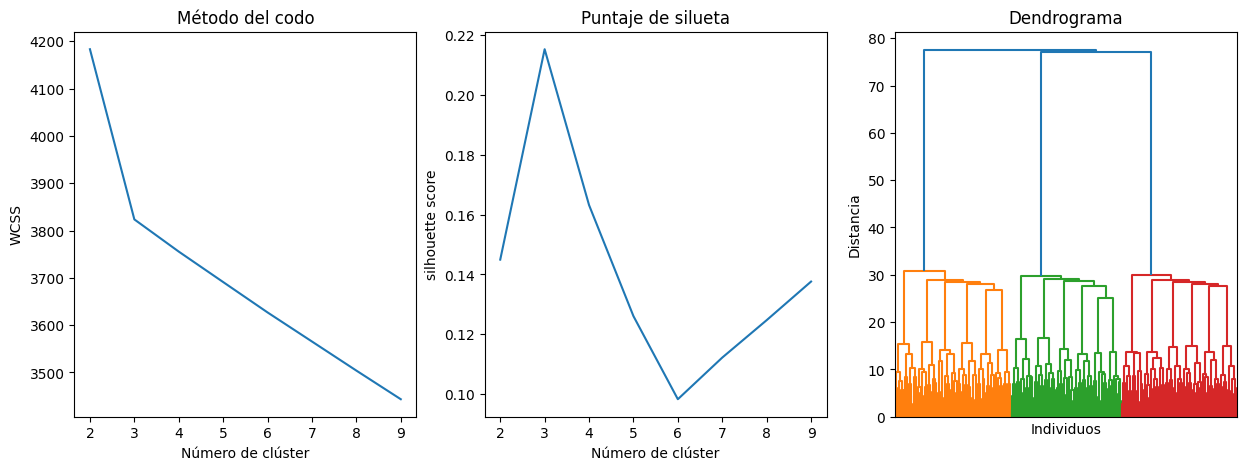

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros)  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[0].set_title("Método del codo")
axes[0].set_xlabel("Número de clúster" )
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")
axes[1].set_title("Puntaje de silueta")
axes[1].set_xlabel("Número de clúster" )

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

Los tres métodos anteriores nos arrojan como mejor clúster el número **3**. Porque el codo en la primera gráfica está en este número, al igual que el máximo en el puntaje de silueta. Y en el dendograma, también notamos que este es el número apropiado.

In [ ]:
#Escogiendo 3
hc=AgglomerativeClustering(3)
hc.fit(scaled_features )
data_sa1["labels_hc"]= hc.labels_
data_sa1["labels_hc"] = data_sa1["labels_hc"].astype(str)
data_sa1["labels_hc"].value_counts()

,count
labels_hc,
0,337
1,332
2,321


In [ ]:
print(data_sa1["labels_hc"].value_counts(normalize=True))
px.bar(data_sa1["labels_hc"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_hc
0    0.340404
1    0.335354
2    0.324242
Name: proportion, dtype: float64


La frecuencia de los clústers es muy pareja puesto que tenemos el 0 con 34%, el 2 con 33% y el 1 con 32%.

###**Branch**

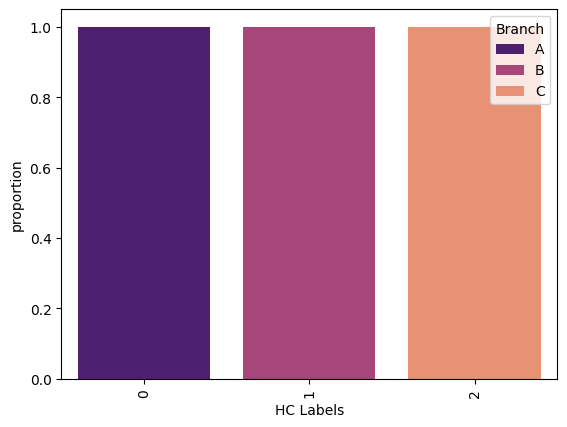

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_hc', data1['Branch']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_hc', y='proportion', hue='Branch', data=proportion_data, palette = 'magma')
plt.xlabel('HC Labels')
plt.xticks(rotation=90)
plt.show()

Acá podemos ver que cada clúster pertenece a una marca de supermercado distinta (lo que queriamos y esperabamos que sucediera). Siendo el clúster 0 de la marca A, el clúster 1 de la B, y el 2 de la C.

###**City**

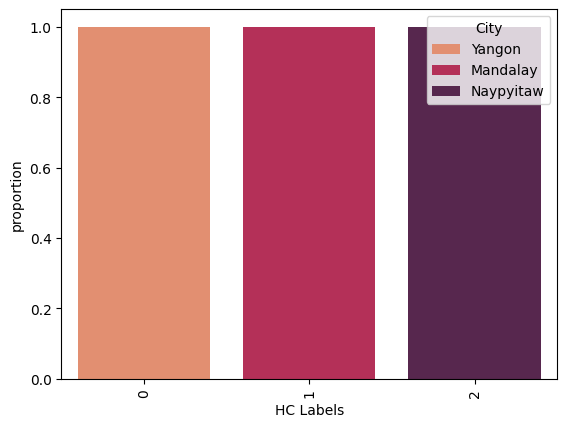

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_hc', data1['City']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_hc', y='proportion', hue='City', data=proportion_data, palette = 'rocket_r')
plt.xlabel('HC Labels')
plt.xticks(rotation=90)
plt.show()

Aqui al igual que en la variable anterior, cada clúster pertenece a una ciudad diferente. El clúster 0 a Yangon, el clúster 1 a Mandalay, y el clúster 2 a Naypyitaw.

###**Customer Type**

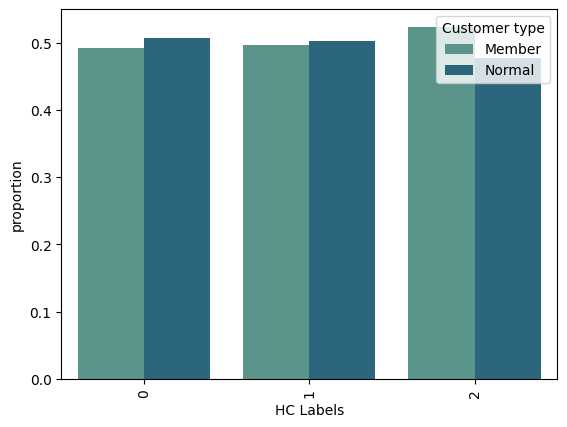

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_hc', data1['Customer type']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_hc', y='proportion', hue='Customer type', data=proportion_data, palette = 'crest')
plt.xlabel('HC Labels')
plt.xticks(rotation=90)
plt.show()

In [ ]:
merged_data = pd.merge(data_sa1['labels_hc'], data1['Customer type'], left_index=True, right_index=True, how='inner')

#Creamos el boxplot
px.box(merged_data, x = 'labels_hc', y='Customer type', color= 'labels_hc', title='Customer Type: Boxplot por clúster')

Según los gráficos, vemos que ambos tipos de clientes son muy parejos en los tres clústers, siendo levemente superado por el otro tipo; mostrando así en el boxplot una gran variabilidad en los tres clústers. En el caso del clúster 0, predomina el tipo de cliente normal, y de esta misma forma actua el clúster 1. Ocurre lo contrario con el clúster 2, que si bien tiene gran cantidad de clientes normales, prevalece los clientes miembros del supermercado.

###**Gender**

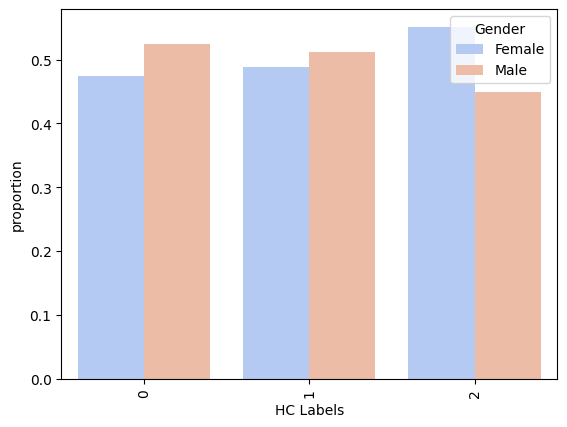

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_hc', data1['Gender']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_hc', y='proportion', hue='Gender', data=proportion_data, palette = 'coolwarm')
plt.xlabel('HC Labels')
plt.xticks(rotation=90)
plt.show()

El gráfico de barras muestra que ambos géneros (Female y Male) tienen proporciones bastante similares en los tres clusters, con una leve predominancia de uno sobre el otro en cada caso. En el Cluster 0, la proporción de hombres es ligeramente superior a la de mujeres, indicando una leve predominancia masculina en este grupo. En el Cluster 1, ocurre lo contrario, con una proporción de mujeres mayor que la de hombres, lo que sugiere una ligera predominancia femenina. Finalmente, en el Cluster 2, aunque ambos géneros están presentes, las mujeres dominan en mayor medida, destacándose como el género más representado en este segmento.

###**Product Line**

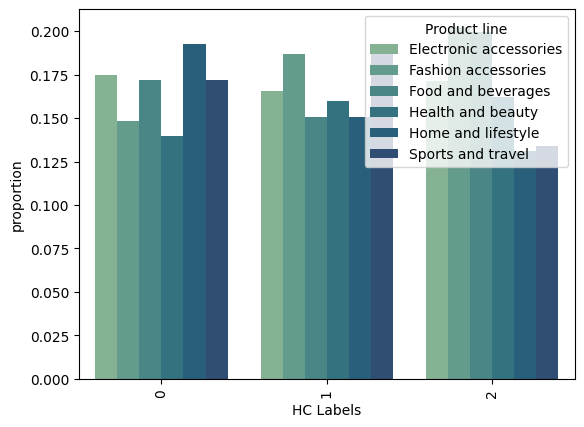

In [ ]:
#Calculamos las proporción para cada clúster y supermercado
proportion_data = data_sa1.groupby(['labels_hc', data1['Product line']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

#Creamos el gráfico
sns.barplot(x='labels_hc', y='proportion', hue='Product line', data=proportion_data, palette = 'crest')
plt.xlabel('HC Labels')
plt.xticks(rotation=90)
plt.show()

En el **clúster 0,** las líneas de productos como **Home and lifestyle** y **Electronic accessories** tienen una proporción relativamente alta. Esto sugiere que los clientes en este grupo tienden a interesarse más por productos relacionados con el hogar y artículos electrónicos, reflejando un comportamiento de compra más orientado hacia la tecnología y el estilo de vida. **El clúster 1** se distingue por una mayor proporción de **Fashion accessories y Sports and travel**, lo que indica que los clientes de este segmento tienen una preferencia o están más concentrados en productos de moda y artículos deportivos o de viaje. Este comportamiento muestra una inclinación hacia productos que representan estilo y actividades al aire libre o recreativas. Por su parte, en el **clúster 2** se observa una proporción notablemente alta de **Fashion accessories y Food and beverages.** Esto refleja un grupo de clientes que combina el interés por la moda con el consumo de alimentos y bebidas, sugiriendo un perfil de clientes que priorizan tanto el estilo como las necesidades diarias.

###**Total**

In [ ]:
px.box(data_sa1, x='labels_hc', y='Total',color="labels_hc",
             title='Costo total de la transacción: Boxplot por clúster')

Al igual que los resultados arrojados por el algoritmo de K-means y de acuerdo a la distribucción de los clústeres que vemos con el clútering jerarquico, se observa que el Clúster 2 es aquel en donde se realizan compras con valores mas altos, ya que tiene la mediana mas alta, que es 266.028 kiat, además tiene valores atípicos hacía arriba con una mayor frecuencia que los demas clústeres. Por otro lado, los Clústeres 0 y 1 son aquellas transacciones de menor valor, con medianas de 236.88 kiat y el 1 con mediana de 252.882 kiat.


###**Payment**

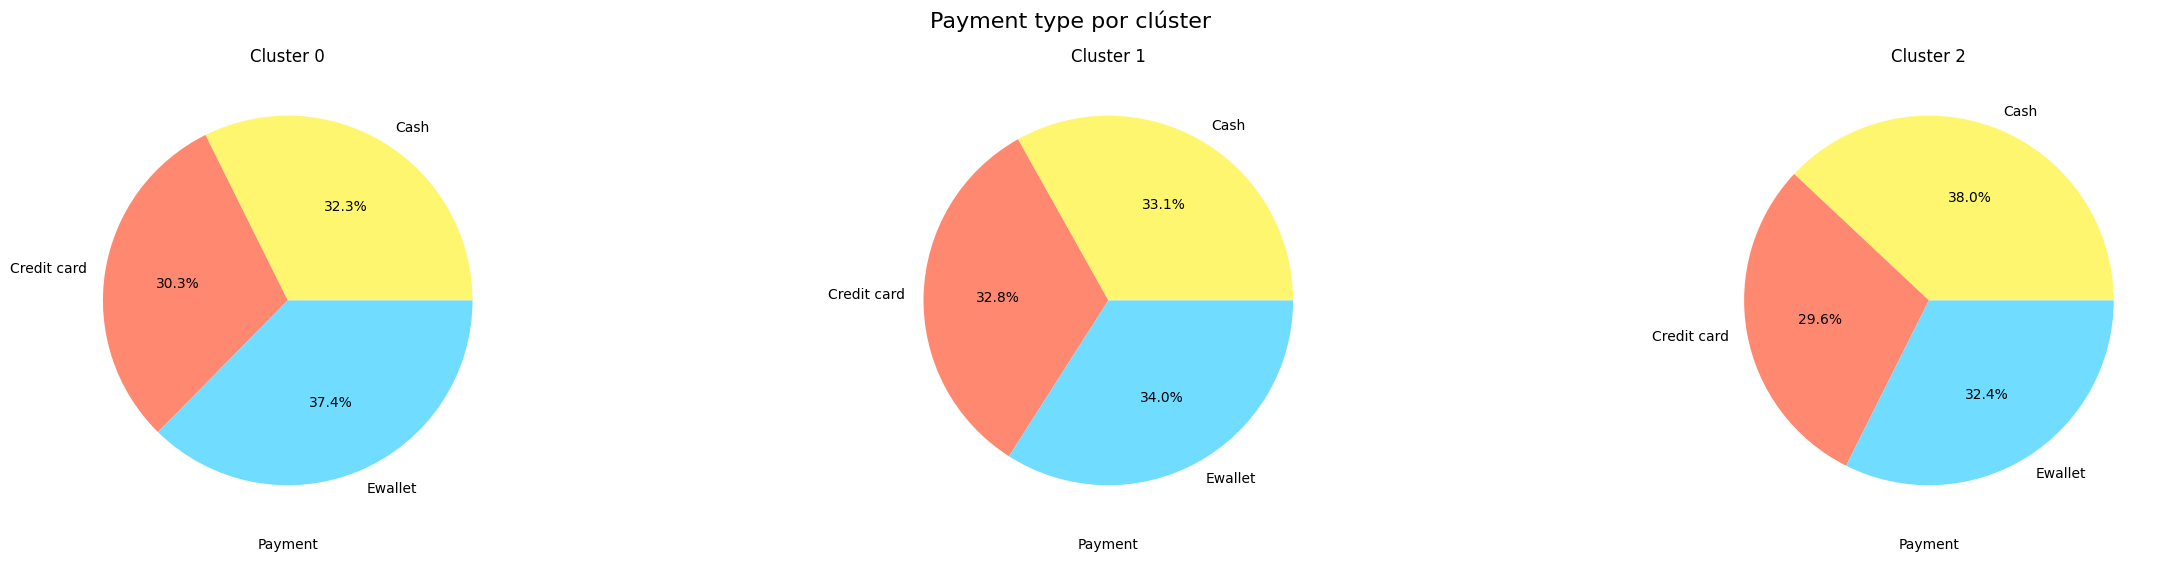

In [ ]:
# Calculamos las proporciones para cada clúster y la variable Payment
proportion_data = data_sa1.groupby(['labels_hc', data1['Payment']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

# Colores para los gráficos de pastel
colors = ['#fff670', '#ff8870', '#70dcff']

# Generamos un gráfico tipo pastel para cada clúster
clusters = proportion_data['labels_hc'].unique()
fig, axes = plt.subplots(1, len(clusters), figsize=(10 * len(clusters), 6))

for i, cluster in enumerate(clusters):
    cluster_data = proportion_data[proportion_data['labels_hc'] == cluster]
    axes[i].pie(cluster_data['proportion'], labels=cluster_data['Payment'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel("Payment")

fig.suptitle('Payment type por clúster', fontsize=16)

plt.show()

De acuerdo a las graficas que nos muestra el algoritmo de K-means, podemos decir que los diferentes metodos de pago en los tres clústeres tienen distribuciones similares, aún así, la preferencia en el tipo de pago varía en cada clúster. Para el clúster 0 y 1, el tipo de pago preferido es el "Ewallet", con un 37% y un 34% respectivamente, por otro lado para el clúster 2 es el "cash" el metodo que predomina, con un 38%. En todos los clústeres observamos que el metodo de pago con tarjeta de credito es el menos utilizado.

###**Rating**

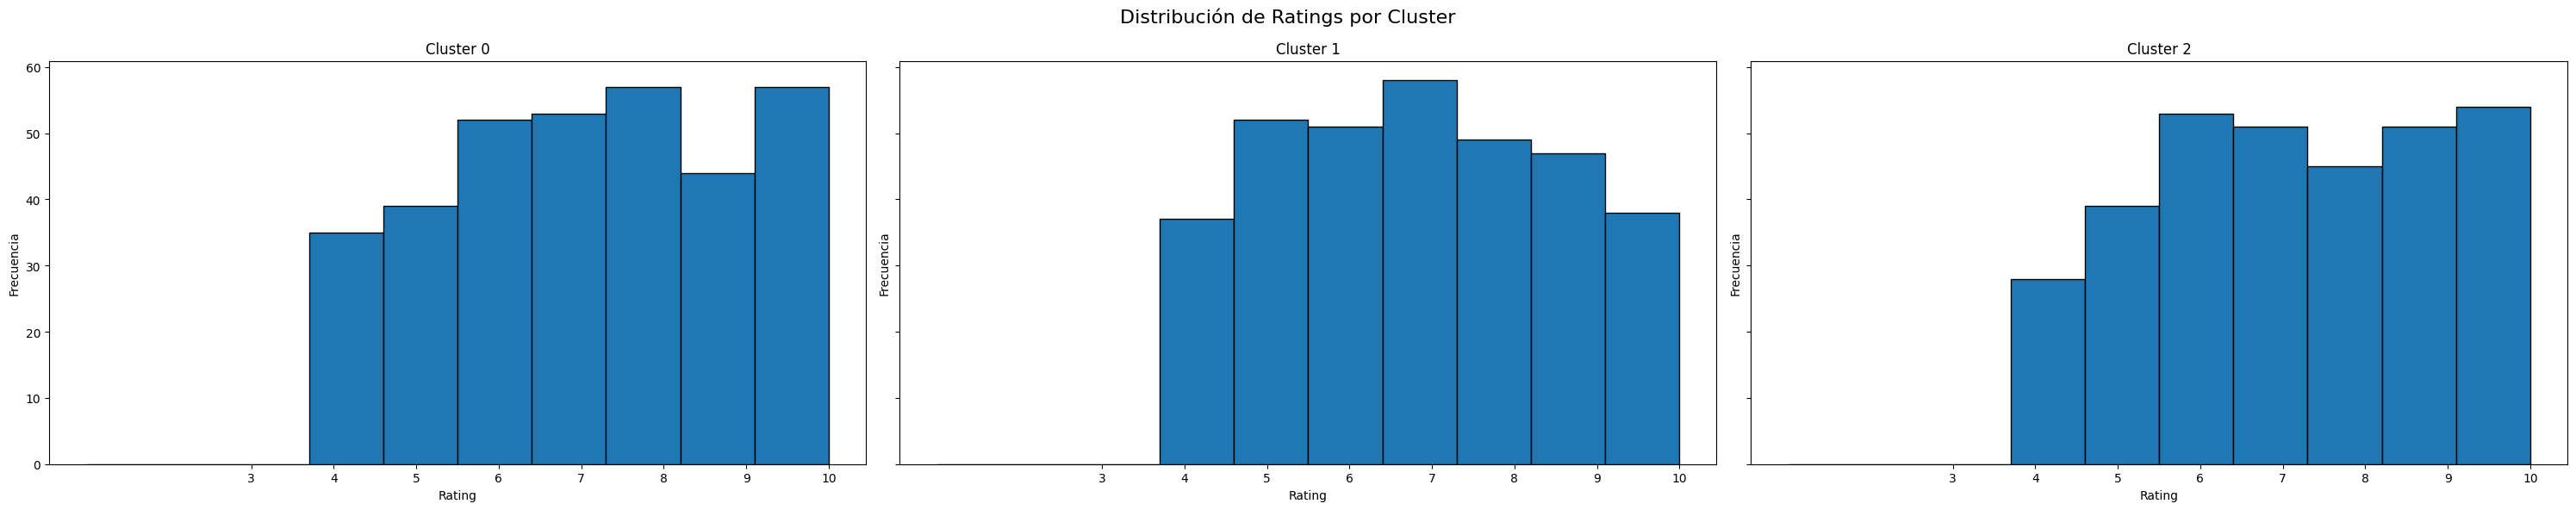

In [ ]:
# Calcula las proporciones para cada clúster y rating
proportion_data = data_sa1.groupby(['labels_hc', data1['Rating']])['labels_hc'].count().reset_index(name='count')
proportion_data['proportion'] = proportion_data['count'] / proportion_data.groupby('labels_hc')['count'].transform('sum')

clusters = proportion_data['labels_hc'].unique()

# Creamos los subplots para cada clúster
fig, axes = plt.subplots(1, len(clusters), figsize=(10 * len(clusters), 6), sharey=True)

# Generar un histograma para cada cluster
for i, cluster in enumerate(clusters):
    cluster_data = data_sa1[data_sa1['labels_hc'] == cluster]['Rating']
    axes[i].hist(cluster_data, bins=10, edgecolor='black', range=(1, 10))
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Rating')
    axes[i].set_xticks(range(3, 11))
    axes[i].set_ylabel('Frecuencia')

fig.suptitle('Distribución de Ratings por Cluster', fontsize=16)

plt.tight_layout()
plt.show()

En la distribución que vemos con el algoritmo de clústering jerarquico, vemos que el Clúster 2 es aquel con niveles de satisfacción mas altos y con poca variabilidad con aquellos puntajes mas bajos, mientras que los Clústeres 0 y 1 agrupan a clientes con niveles de satisfacción más variados y moderados, respectivamente.

###**Análisis de Clústers: (Clustering Jerárquico)**

**Cluster 0**

*Branch:* A

*City:* Yangon

*Customer Type:* Normal, con alta tendencia de clientes miembros.

*Gender:* En este cluster, los hombres (Male) tienen una proporción mayor que las mujeres (Female), mostrando una ligera predominancia masculina.

*Product line:* Las líneas de productos como Home and lifestyle y Electronic accessories parecen tener una proporción relativamente alta en este clúster.

*Total:* Es el clúster con un promedio de transacciones mas bajas.

*Payment:* El metodo de pago que predomina es el "Ewallet" con un 37.4% de preferencia, seguido por el "cash" con un 32.3%, y finalmente el menos usado es el "credit card" con un 30.3%.

*Rating:* Tiene una distribución más variada en los niveles de satisfacción con una ligera tendencia hacia ratings altos.

**Cluster 1**

*Branch:* B

*City:* Mandalay

*Customer Type:* Normal, pero con un alto nivel de clientes miembros.

*Gender:* La proporción de mujeres es mayor que la de los hombres, sugiriendo una predominancia femenina en este cluster.

*Product line:* Este clúster destaca por una mayor proporción de Fashion accessories y Sports and travel, lo que sugiere una preferencia o concentración hacia esos productos.

*Total:* Aquí hay transacciones más altas y datos atípicos un poco mas hacia arriba (y mas frecuentes) que el clúster 0.

*Payment:* El metodo de pago mas utilizado en este clúster es el "Ewallet" con un 34% de preferencia, luego esta el "cash" con un 33.1%, y finalmente el menos utilizado es el "credit card" con un 32.8%.

*Rating:* Tiene una concentración de ratings con niveles de satisfacción mas moderados, lo que podría indicar una satisfacción templado y hay menor variabilidad.

**Cluster 2**

*Branch:* C

*City:* Naypyitaw

*Customer Type:* Normal, con una alta variedad de clientes que son miembros

*Gender:* La proporción de mujeres es notablemente superior a la de los hombres, mostrando una gran mayoría femenina en este grupo.

*Product line:* Hay una proporción notablemente alta de Fashion accessories y
 Food and beverages.

 *Total:* Se encuentran las transacciones mas altas y los datos atípicos son mas frecuentes (hacia arriba) que en los otros clústeres.

*Payment:* El metodo de pago mas recurrente es el "Cash", correspondiente al 38% del total, seguido por el "Ewallet" con un 32.4%, y finalmente el menos recurrente es el "credit card" con un 29.5%.

*Rating:* En este clúster hay mayor concentración en los niveles de satisfacción altos, lo que indica una alta satisfacción entre los clientes de este grupo.